# Decision Trees

In [15]:
import pandas as pd 
import numpy as np 

from sklearn import tree
from sklearn.tree import DecisionTreeClassifier, export_graphviz
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score
from sklearn import metrics
from sklearn import datasets
from matplotlib import pyplot as plt
import seaborn as sns
import statistics

# import graphviz
import pydotplus
import io
from scipy import misc

%matplotlib inline

In [16]:
# Import Feature Set
%store -r master
%store -r feature_set_1
%store -r feature_set_2
%store -r feature_set_3

In [17]:
#Function that generates the decision tree visualizations
def show_tree(tree, features, path):
    f = io.StringIO()
    export_graphviz(tree, out_file=f, feature_names=features)
    pydotplus.graph_from_dot_data(f.getvalue()).write_png(path)
    img = plt.imread(path)
    plt.rcParams['figure.figsize'] = (20,20)
    plt.imshow(img)

In [18]:
def k_fold_dt (X,Y):
    
    model = DecisionTreeClassifier(min_samples_split=100)

    # Perform K-fold cross validation to make training and testing datasets, k = 10
    kf = KFold(n_splits=10)
    i = 1 #counter for iterations
    acc_set = []

    for training, testing in kf.split(X):
        print("-------------------------- start k =",i,"--------------------------")
        #Define testing and training row indices (indicates which rows fall under which dataset)
        print("Train Index: ", training, "\n")
        print("Test Index: ", testing, "\n")
        min_tr = min(training)
        max_tr = max(training)
        min_test = min(testing)
        max_test = max(testing)
        X_training_data = X.iloc[min_tr:(max_tr+1)]
        X_testing_data = X.iloc[min_test:(max_test+1)]
        Y_training_data = Y.iloc[min_tr:(max_tr+1)]
        Y_testing_data = Y.iloc[min_test:(max_test+1)]

        #Fit model
        model.fit(X_training_data, Y_training_data)

        #Determine accuracy score
        class_predict = model.predict(X_testing_data)
        acc_score = accuracy_score(Y_testing_data, class_predict)
        print("Accuracy Score: ", acc_score, "\n")
        print("-------------------------- end k =",i,"--------------------------","\n")
        
        acc_set.append(acc_score)
        i += 1
        
    return model, acc_set

## FEATURE SET 1

In [19]:
# Set X as features data (remove class variable and player name)
feature_set_1 = feature_set_1.dropna()
X = feature_set_1.drop('MIP',axis=1).drop('Player', axis=1)
feature_names1 = list(X.columns)

In [20]:
#Set Y as target class
Y = feature_set_1.MIP

In [21]:
#Run k-fold and get accuracy
dt_1 = k_fold_dt(X,Y)[0]
acc_set1 = k_fold_dt(X,Y)[1]
print("Accuracy Score Set",acc_set1,"\n")
avg_acc1 = statistics.mean((acc_set1))

-------------------------- start k = 1 --------------------------
Train Index:  [ 404  405  406 ... 4036 4037 4038] 

Test Index:  [  0   1   2   3   4   5   6   7   8   9  10  11  12  13  14  15  16  17
  18  19  20  21  22  23  24  25  26  27  28  29  30  31  32  33  34  35
  36  37  38  39  40  41  42  43  44  45  46  47  48  49  50  51  52  53
  54  55  56  57  58  59  60  61  62  63  64  65  66  67  68  69  70  71
  72  73  74  75  76  77  78  79  80  81  82  83  84  85  86  87  88  89
  90  91  92  93  94  95  96  97  98  99 100 101 102 103 104 105 106 107
 108 109 110 111 112 113 114 115 116 117 118 119 120 121 122 123 124 125
 126 127 128 129 130 131 132 133 134 135 136 137 138 139 140 141 142 143
 144 145 146 147 148 149 150 151 152 153 154 155 156 157 158 159 160 161
 162 163 164 165 166 167 168 169 170 171 172 173 174 175 176 177 178 179
 180 181 182 183 184 185 186 187 188 189 190 191 192 193 194 195 196 197
 198 199 200 201 202 203 204 205 206 207 208 209 210 211 212 213 2

Accuracy Score:  0.9529702970297029 

-------------------------- end k = 1 -------------------------- 

-------------------------- start k = 2 --------------------------
Train Index:  [   0    1    2 ... 4036 4037 4038] 

Test Index:  [404 405 406 407 408 409 410 411 412 413 414 415 416 417 418 419 420 421
 422 423 424 425 426 427 428 429 430 431 432 433 434 435 436 437 438 439
 440 441 442 443 444 445 446 447 448 449 450 451 452 453 454 455 456 457
 458 459 460 461 462 463 464 465 466 467 468 469 470 471 472 473 474 475
 476 477 478 479 480 481 482 483 484 485 486 487 488 489 490 491 492 493
 494 495 496 497 498 499 500 501 502 503 504 505 506 507 508 509 510 511
 512 513 514 515 516 517 518 519 520 521 522 523 524 525 526 527 528 529
 530 531 532 533 534 535 536 537 538 539 540 541 542 543 544 545 546 547
 548 549 550 551 552 553 554 555 556 557 558 559 560 561 562 563 564 565
 566 567 568 569 570 571 572 573 574 575 576 577 578 579 580 581 582 583
 584 585 586 587 588 589 590 591 59

### Decision Tree 1

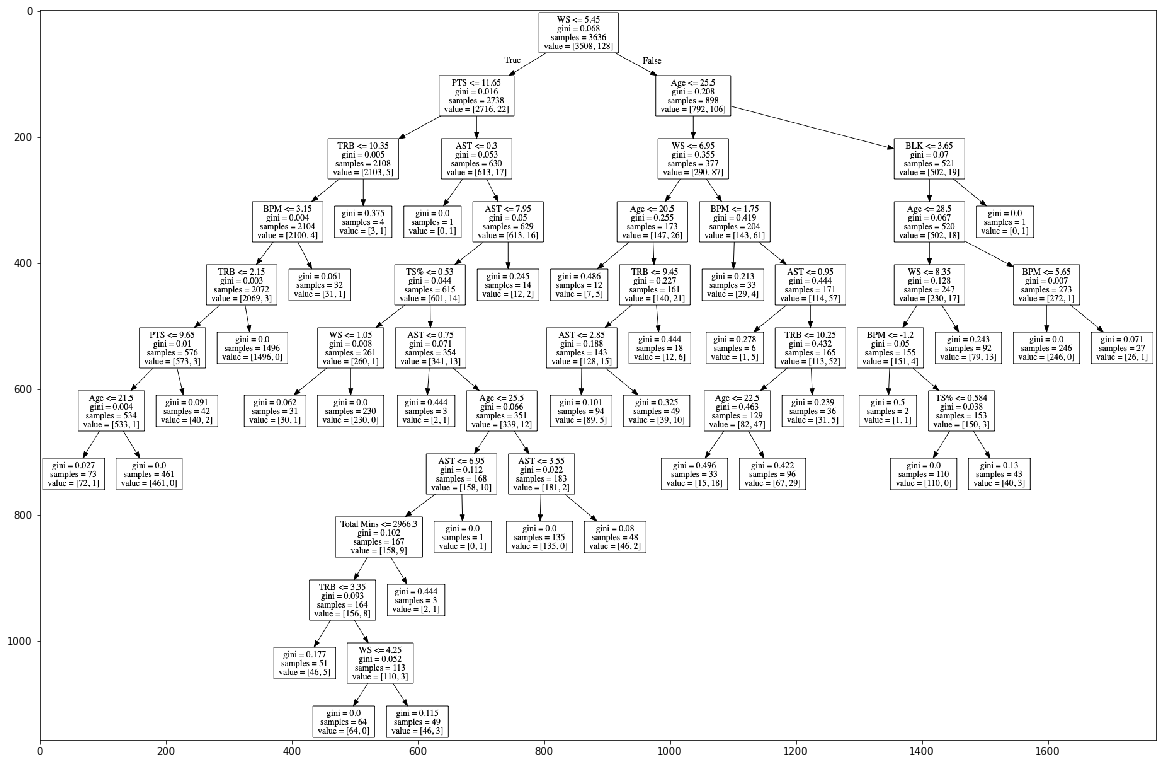

In [22]:
show_tree(dt_1, feature_names1, 'decision_tree_1')

## FEATURE SET 2

In [23]:
# Set X as features data (remove class variable and player name)
feature_set_2 = feature_set_2.dropna()
X2 = feature_set_2.drop('MIP',axis=1).drop('Player', axis=1)
feature_names2 = list(X2.columns)
#Set Y as target class
Y2 = feature_set_2.MIP

In [24]:
#Initialize the model
dt_2 = k_fold_dt(X2,Y2)[0]
acc_set2 = k_fold_dt(X2,Y2)[1]
print("Accuracy Score Set",acc_set2,"\n")
avg_acc2 = statistics.mean((acc_set2))

-------------------------- start k = 1 --------------------------
Train Index:  [ 373  374  375 ... 3722 3723 3724] 

Test Index:  [  0   1   2   3   4   5   6   7   8   9  10  11  12  13  14  15  16  17
  18  19  20  21  22  23  24  25  26  27  28  29  30  31  32  33  34  35
  36  37  38  39  40  41  42  43  44  45  46  47  48  49  50  51  52  53
  54  55  56  57  58  59  60  61  62  63  64  65  66  67  68  69  70  71
  72  73  74  75  76  77  78  79  80  81  82  83  84  85  86  87  88  89
  90  91  92  93  94  95  96  97  98  99 100 101 102 103 104 105 106 107
 108 109 110 111 112 113 114 115 116 117 118 119 120 121 122 123 124 125
 126 127 128 129 130 131 132 133 134 135 136 137 138 139 140 141 142 143
 144 145 146 147 148 149 150 151 152 153 154 155 156 157 158 159 160 161
 162 163 164 165 166 167 168 169 170 171 172 173 174 175 176 177 178 179
 180 181 182 183 184 185 186 187 188 189 190 191 192 193 194 195 196 197
 198 199 200 201 202 203 204 205 206 207 208 209 210 211 212 213 2

 3717 3718 3719 3720 3721 3722 3723 3724] 

Accuracy Score:  0.9731182795698925 

-------------------------- end k = 10 -------------------------- 

-------------------------- start k = 1 --------------------------
Train Index:  [ 373  374  375 ... 3722 3723 3724] 

Test Index:  [  0   1   2   3   4   5   6   7   8   9  10  11  12  13  14  15  16  17
  18  19  20  21  22  23  24  25  26  27  28  29  30  31  32  33  34  35
  36  37  38  39  40  41  42  43  44  45  46  47  48  49  50  51  52  53
  54  55  56  57  58  59  60  61  62  63  64  65  66  67  68  69  70  71
  72  73  74  75  76  77  78  79  80  81  82  83  84  85  86  87  88  89
  90  91  92  93  94  95  96  97  98  99 100 101 102 103 104 105 106 107
 108 109 110 111 112 113 114 115 116 117 118 119 120 121 122 123 124 125
 126 127 128 129 130 131 132 133 134 135 136 137 138 139 140 141 142 143
 144 145 146 147 148 149 150 151 152 153 154 155 156 157 158 159 160 161
 162 163 164 165 166 167 168 169 170 171 172 173 174 175 176 17

### Decision Tree 2

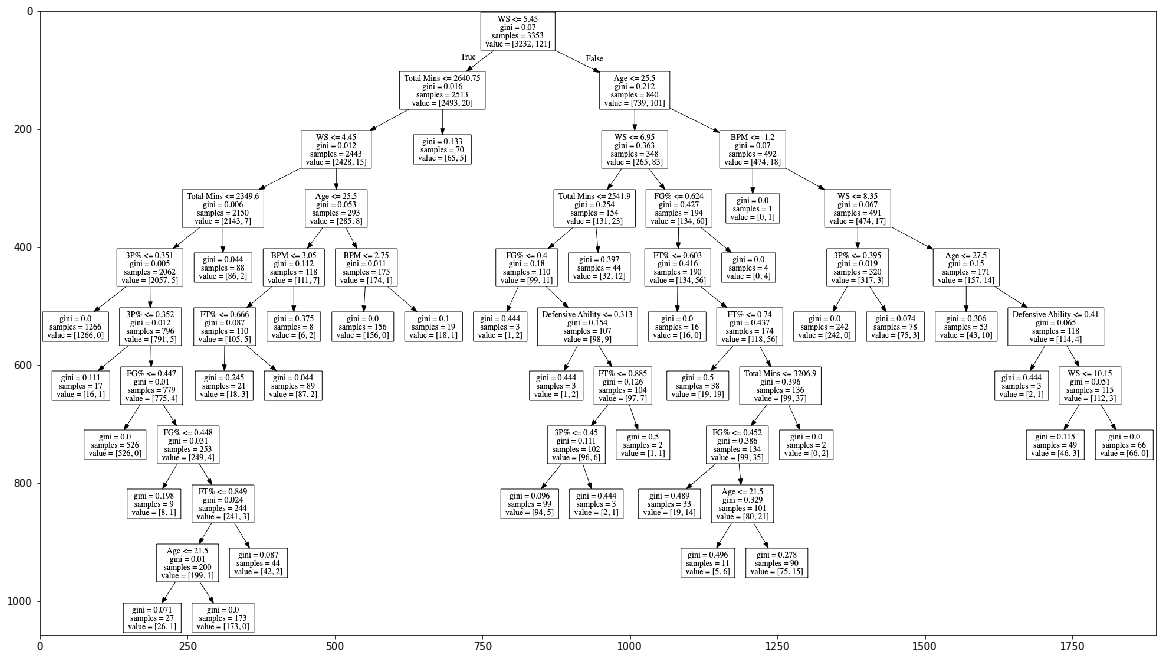

In [25]:
show_tree(dt_2, feature_names2, 'decision_tree_2')

## FEATURE SET 3

In [26]:
# Set X as features data (remove class variable and player name)
feature_set_3 = feature_set_3.dropna()
X3 = feature_set_3.drop('MIP',axis=1).drop('Player', axis=1)
feature_names3 = list(X3.columns)
#Set Y as target class
Y3 = feature_set_3.MIP

In [27]:
#Initialize the model
dt_3 = k_fold_dt(X3,Y3)[0]
acc_set3 = k_fold_dt(X3,Y3)[1]
print("Accuracy Score Set",acc_set3,"\n")
avg_acc3 = statistics.mean((acc_set3))


-------------------------- start k = 1 --------------------------
Train Index:  [ 267  268  269 ... 2662 2663 2664] 

Test Index:  [  0   1   2   3   4   5   6   7   8   9  10  11  12  13  14  15  16  17
  18  19  20  21  22  23  24  25  26  27  28  29  30  31  32  33  34  35
  36  37  38  39  40  41  42  43  44  45  46  47  48  49  50  51  52  53
  54  55  56  57  58  59  60  61  62  63  64  65  66  67  68  69  70  71
  72  73  74  75  76  77  78  79  80  81  82  83  84  85  86  87  88  89
  90  91  92  93  94  95  96  97  98  99 100 101 102 103 104 105 106 107
 108 109 110 111 112 113 114 115 116 117 118 119 120 121 122 123 124 125
 126 127 128 129 130 131 132 133 134 135 136 137 138 139 140 141 142 143
 144 145 146 147 148 149 150 151 152 153 154 155 156 157 158 159 160 161
 162 163 164 165 166 167 168 169 170 171 172 173 174 175 176 177 178 179
 180 181 182 183 184 185 186 187 188 189 190 191 192 193 194 195 196 197
 198 199 200 201 202 203 204 205 206 207 208 209 210 211 212 213 2

Accuracy Score:  0.9661654135338346 

-------------------------- end k = 7 -------------------------- 

-------------------------- start k = 8 --------------------------
Train Index:  [   0    1    2 ... 2662 2663 2664] 

Test Index:  [1867 1868 1869 1870 1871 1872 1873 1874 1875 1876 1877 1878 1879 1880
 1881 1882 1883 1884 1885 1886 1887 1888 1889 1890 1891 1892 1893 1894
 1895 1896 1897 1898 1899 1900 1901 1902 1903 1904 1905 1906 1907 1908
 1909 1910 1911 1912 1913 1914 1915 1916 1917 1918 1919 1920 1921 1922
 1923 1924 1925 1926 1927 1928 1929 1930 1931 1932 1933 1934 1935 1936
 1937 1938 1939 1940 1941 1942 1943 1944 1945 1946 1947 1948 1949 1950
 1951 1952 1953 1954 1955 1956 1957 1958 1959 1960 1961 1962 1963 1964
 1965 1966 1967 1968 1969 1970 1971 1972 1973 1974 1975 1976 1977 1978
 1979 1980 1981 1982 1983 1984 1985 1986 1987 1988 1989 1990 1991 1992
 1993 1994 1995 1996 1997 1998 1999 2000 2001 2002 2003 2004 2005 2006
 2007 2008 2009 2010 2011 2012 2013 2014 2015 2016 2017

## Accuracy Scores

In [28]:
print("Mean Accuracy Score - DT 1:",avg_acc1)
print("Mean Accuracy Score - DT 2:",avg_acc2)
print("Mean Accuracy Score - DT 3:",avg_acc3)

Mean Accuracy Score - DT 1: 0.9658335994889812
Mean Accuracy Score - DT 2: 0.9664410908357116
Mean Accuracy Score - DT 3: 0.9590999971839711


### The highest accuracy score is for Feature Set 2
### 2nd Highest: Feature Set 1
### 3rd Highest: Feature Set 3